# Modeling Motion Detection Using the Reichardt-Hassenstein

Start with a signal e.g. a moving stripe. The general form of a gaussian moving with a speed v is $y(x,t) = exp[-(x - vt)^2]$

In [53]:
import matplotlib.pyplot as plt  
import numpy as np

v = 1
dx = 1
dt = 1

def f(x,t):
    return np.exp(-(x - v*t)**2)

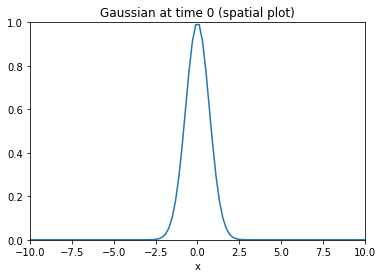

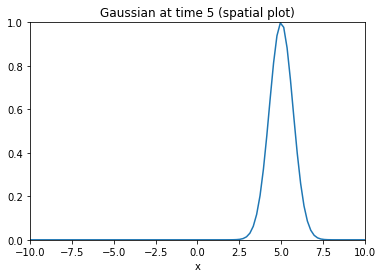

In [54]:
x = np.linspace(-10,10,100)

y = f(x,0)

plt.plot(x, y)  
plt.xlim([-10, 10])  
plt.ylim([0, 1])  
plt.title('Gaussian at time 0 (spatial plot)')
plt.xlabel('x')
plt.show() 

y = f(x,5)

plt.plot(x, y)  
plt.xlim([-10, 10])  
plt.ylim([0, 1])  
plt.title('Gaussian at time 5 (spatial plot)')
plt.xlabel('x')
plt.show() 

A detector at $x_1 = 0$ will see a wave of the form 
$y_1(0,t) = y_1(t) = e^{-(vt)^2}$

A detector at $x_2 = \Delta x$ will see a wave of the form 
$y_2(\Delta x, t) = y_2(t) = e^{-(\Delta x - vt)^2}$

In [55]:
def y1(t):
    return f(0,t)

def y2(t):
    return f(dx,t)

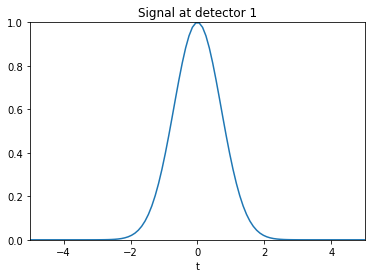

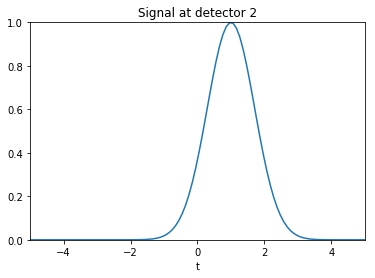

In [56]:
t = np.linspace(-5,5,100)

y = y1(t)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 1')
plt.xlabel('t')
plt.show()

y = y2(t)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 2')
plt.xlabel('t')
plt.show() 

The left channel of the RH detector computes $y_1(t-\Delta t) \cdot y_2(t)$

The right channel of the RH detector computes $y_1(t) \cdot y_2(t-\Delta t)$

The RH detector computes the difference of the left and right channels
$y_1(t-\Delta t) \cdot y_2(t) - y_1(t) \cdot y_2(t-\Delta t)$

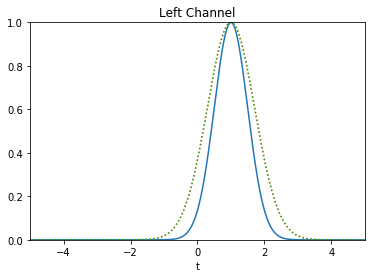

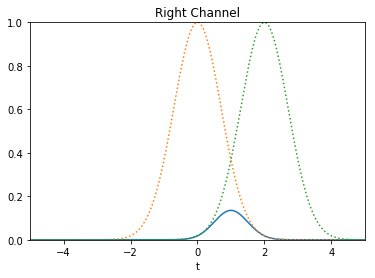

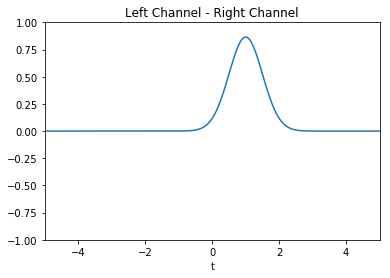

In [57]:
t = np.linspace(-5,5,1000)

plt.plot(t, y1(t-dt) * y2(t))  
plt.plot(t, y1(t-dt),linestyle=':')
plt.plot(t, y2(t),linestyle=':')  
plt.xlim([-5, 5])  
plt.ylim([0, 1])
plt.xlabel('t')
plt.title('Left Channel')  
plt.show() 


plt.plot(t, y1(t) * y2(t-dt))  
plt.plot(t, y1(t),linestyle=':')  
plt.plot(t, y2(t-dt),linestyle=':')
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.xlabel('t')
plt.title('Right Channel')  
plt.show()

plt.plot(t, y1(t-dt) * y2(t) - y1(t) * y2(t-dt))  
plt.xlim([-5, 5])  
plt.ylim([-1, 1])  
plt.xlabel('t')
plt.title('Left Channel - Right Channel')  
plt.show() 

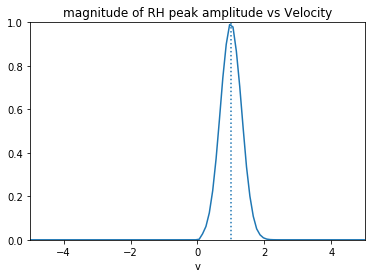

In [97]:
a = 10

def RH(v0):
    t = np.linspace(0,5,100)
    y = np.exp(-a*(v0*(t-dt))**2)*np.exp(-a*(dx - v0*t)**2) - 0*np.exp(-a*(v0*t)**2)*np.exp(-a*(dx - v0*(t-dt))**2)
    return max(abs(y))

v0 = np.linspace(-5,5,100)
y = np.array(list(map(RH,v0)))

plt.plot(v0, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])
plt.xlabel('v')
plt.axvline(x=dx/dt, ymin=-1, ymax=1,linestyle=':')
#sigma = np.sqrt(2)/np.sqrt(a)
#plt.axvline(x=((1+sigma)/2)*dx/dt, ymin=-1, ymax=1,linestyle=':')
plt.title('magnitude of RH peak amplitude vs Velocity')  
plt.show()

*Takeaway*: 
1. If the peak of the velocity dependence curve (i.e. velocity at which RH has greatest response) depends on the width of the gaussian, this suggests that both channels are being used with subtraction. That's because if you only have one channel, the vmax of the RH detector would be v = dx/dt i.e. independent of the width of the Gaussian / spatial frequency of the grating. If the optimal speed is pattern dependent then there is opponency.
2. The optimal speed can't be lower than dx/dt
3. The optimum velocity of the RH detector depends on the width of the gaussian / separation of the grating and The optimal speed increases as the width of the gaussian increases / spatial frequency decreases